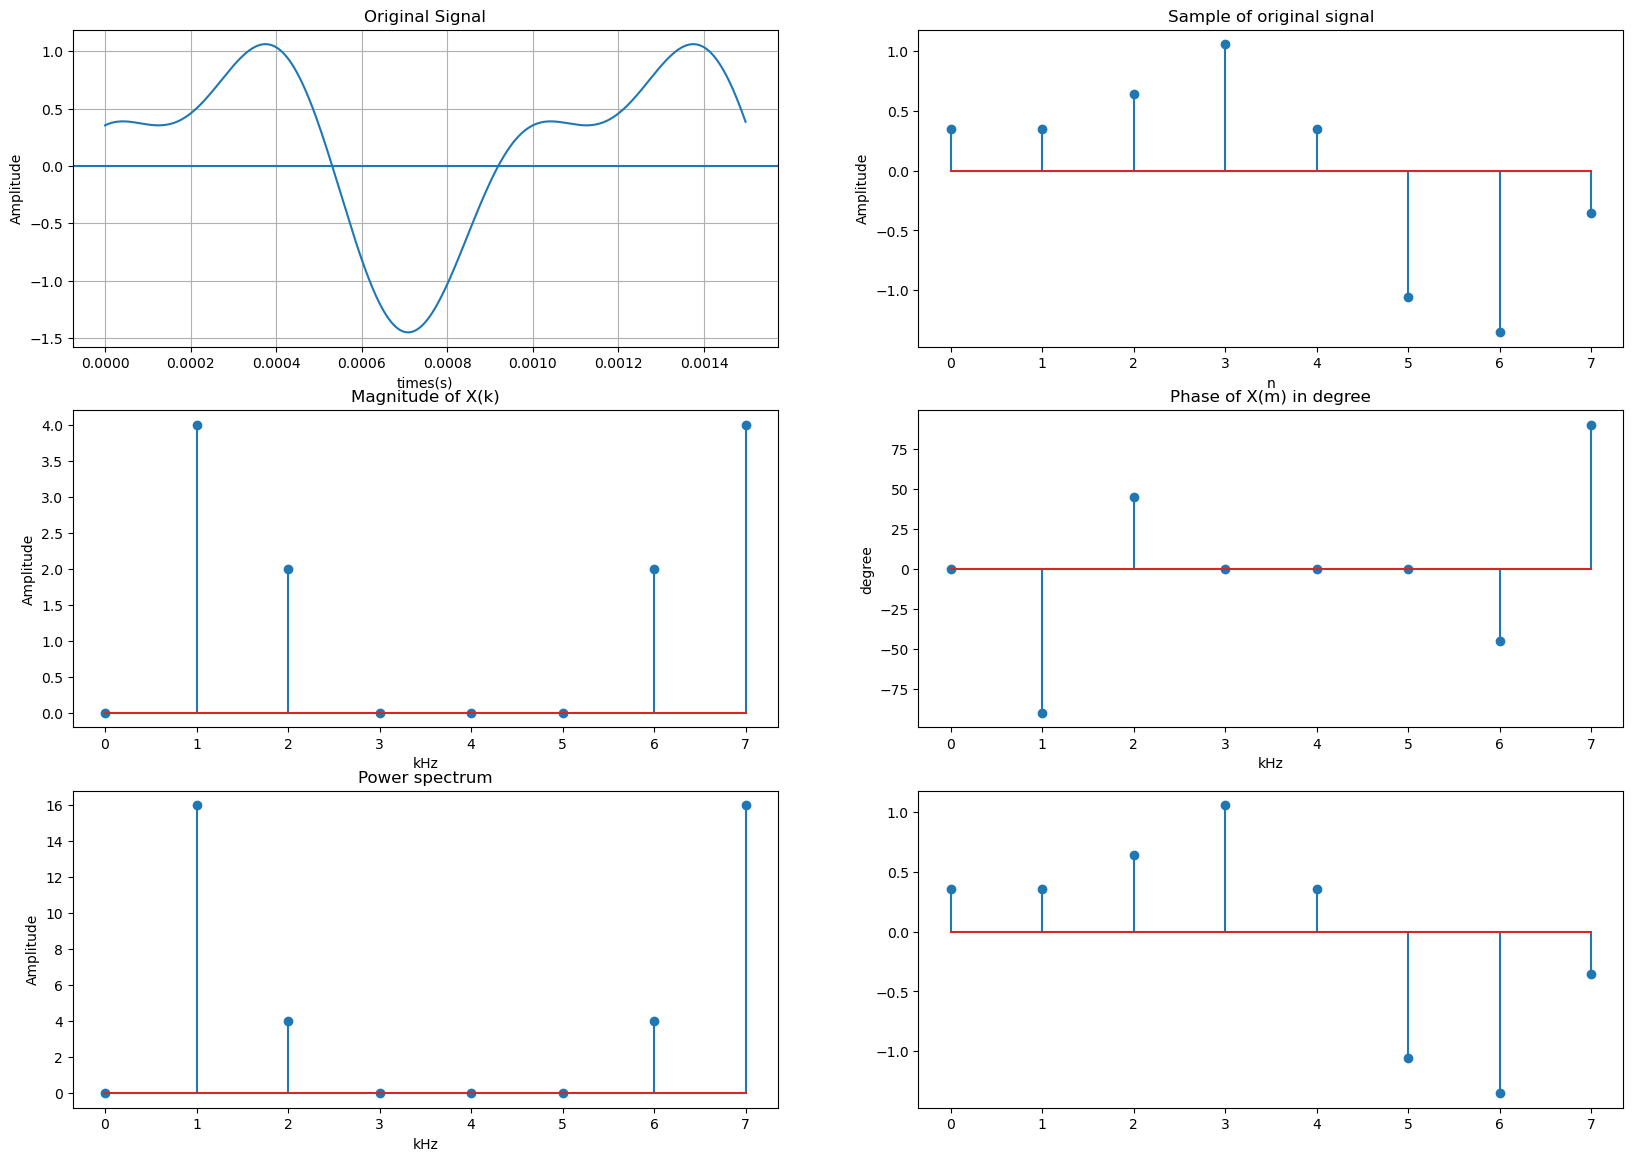

In [132]:
import numpy as np
import matplotlib.pyplot as plt


N = 8

def phase_generator(dft_values):
    phase_values = np.zeros(N)
    for i in range(N):
        theta = np.arctan2(round(dft_values[i].imag), round(dft_values[i].real))
        theta = np.degrees(theta)
        phase_values[i] = theta
    return phase_values

def magnitude_generator(dft_values):
    return np.abs(dft_values)

def idft(dft_values):
    idft_values = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            idft_values[n] += (dft_values[k] * np.exp(1j * 2 * np.pi * n * k / N))
        idft_values[n] = idft_values[n] / N
    return idft_values

def dft(y_values):
    dft_values = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_values[k] += (y_values[n] * np.exp(-1j * 2 * np.pi * k * n / N))
    return dft_values

def signal_generator(A1 = 1, A2 = 0.5, f1 = 1000, f2 = 2000, phase1 = 0, phase2 = 3 * np.pi / 4):
    time = np.arange(0, 0.0015, 0.0015 / 512)
    y_values = A1 * np.sin(2 * np.pi * f1 * time + phase1) + A2 * np.sin(2 * np.pi * f2 * time + phase2)
    return time, y_values

def sampler(A1 = 1, A2 = 0.5, f1 = 1000, f2 = 2000, phase1 = 0, phase2 = 3 * np.pi / 4, sample_rate = 1 / 8000):
    time = np.arange(0, 0.001, sample_rate)
    y_values = A1 * np.sin(2 * np.pi * f1 * time + phase1) + A2 * np.sin(2 * np.pi * f2 * time + phase2)
    return time, y_values


time, y_values = signal_generator()
plt.figure(figsize=(20, 14))
plt.subplot(3, 2, 1)
plt.plot(time, y_values)
plt.axhline()
plt.title('Original Signal')
plt.xlabel('times(s)')
plt.ylabel('Amplitude')
plt.grid(True)

time, y_values = sampler()
plt.subplot(3, 2, 2)
plt.stem(y_values)
plt.title('Sample of original signal')
plt.xlabel('n')
plt.ylabel('Amplitude')

dft_values = dft(y_values)
magnitude_values = magnitude_generator(dft_values)
plt.subplot(3, 2, 3)
plt.stem(magnitude_values)
plt.title('Magnitude of X(k)')
plt.xlabel('kHz')
plt.ylabel('Amplitude')


phase_values = phase_generator(dft_values)
# print(round(dft_values[1].real), round(dft_values[1].imag))
plt.subplot(3, 2, 4)
plt.stem(phase_values)
plt.title('Phase of X(m) in degree')
plt.xlabel('kHz')
plt.ylabel('degree')

plt.subplot(3, 2, 5)
plt.stem(np.abs(dft_values) ** 2)
plt.title('Power spectrum')
plt.xlabel('kHz')
plt.ylabel('Amplitude')


idft_values = idft(dft_values)
#print(np.real(dft_values))
plt.subplot(3, 2, 6)
plt.stem(np.real(idft_values))
plt.show()


8000
